# Quantum Teleportation Implementation

## importing necessary libraries from Qiskit1.x

In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.primitives import Sampler
import matplotlib.pyplot as plt

simulator = AerSimulator()

def quasi_probs_to_counts(quasi_probs, shots):
    counts = {}
    for bitstring, quasi_prob in quasi_probs.items():
        counts[bitstring] = int(round(quasi_prob * shots))
    return counts



     ┌───┐                ┌─┐   
q_0: ┤ H ├──■────────■────┤M├───
     └───┘┌─┴─┐      │ ┌─┐└╥┘   
q_1: ─────┤ X ├──■───┼─┤M├─╫────
     ┌───┐└───┘┌─┴─┐ │ └╥┘ ║ ┌─┐
q_2: ┤ H ├─────┤ X ├─■──╫──╫─┤M├
     └───┘     └───┘    ║  ║ └╥┘
c: 3/═══════════════════╩══╩══╩═
                        1  0  2 
Quantum Teleportation:
{0: 251, 3: 245, 4: 272, 7: 256}


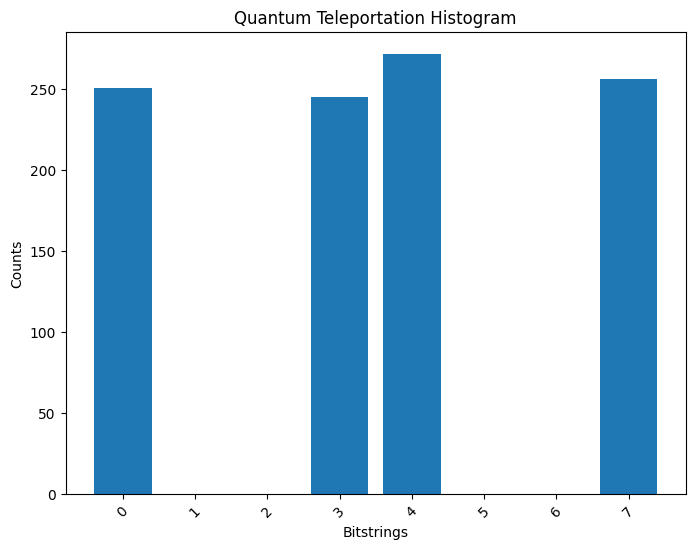

In [3]:

def quantum_teleportation():
    qc = QuantumCircuit(3, 3)

    # Prepare the initial state
    qc.h(0)
    qc.cx(0, 1)
    qc.h(2)
    qc.cx(1, 2)
    qc.cz(0, 2)

    # Measurement
    
    qc.measure([0, 1, 2], [0, 1, 2])
    qc = transpile(qc, simulator)
    print(qc)
    sampler = Sampler()
    result = sampler.run([qc], shots=1024).result()
    quasi_probs = result.quasi_dists[0]
    counts = quasi_probs_to_counts(quasi_probs, 1024)
    print("Quantum Teleportation:")
    print(counts)
    
    # Plot histogram with binary x-axis labels
    plt.figure(figsize=(8, 6))
    plt.bar(counts.keys(), counts.values())
    plt.xlabel('Bitstrings')
    plt.ylabel('Counts')
    plt.xticks(rotation=45)
    plt.title("Quantum Teleportation Histogram")
    plt.show()
    
quantum_teleportation()